In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def kernel (point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.asmatrix(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights



In [ ]:
def localWeight(point,xmat,ymat,k):
    wei = kernel (point,xmat,k)
    W = (X.T*(wei*X)). I*(X.T* (wei*ymat.T))
    return W



In [ ]:
def localWeightRegression (xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]* localWeight(xmat[i], xmat,ymat,k)
    return ypred



In [ ]:
def graphPlot(X, ypred):
    sortindex = X[:,1].argsort(0) #argsort index of the smallest
    xsort = X[sortindex] [:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill, tip, color='green')
    ax.plot(xsort[:, 1], ypred [sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();



In [ ]:
# Load data points
data = pd.read_csv('./tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.asmatrix(bill)
mtip = np.asmatrix(tip)
m = np.shape(mbill)[1]
one = np.asmatrix(np.ones(m))
X = np.hstack((one.T,mbill.T)) #20 TONS, 2 cols



<ipython-input-11-eb1ea9f94a2c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
<ipython-input-13-c265b5aa3d49>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i]* localWeight(xmat[i], xmat,ymat,k)


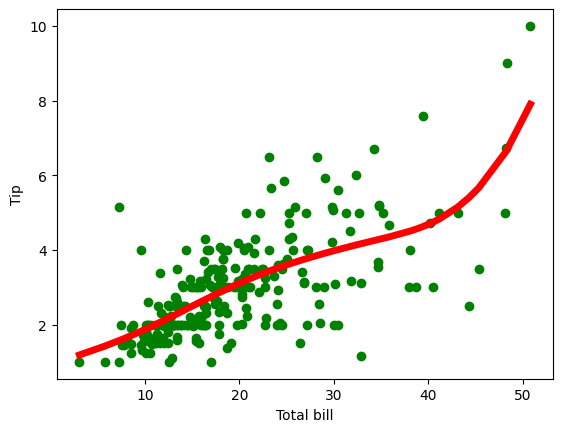

In [ ]:
ypred = localWeightRegression(X,mtip,6)

graphPlot(X,ypred)